# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [43]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [44]:
# rename columns to be more readable
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

# drop columns with missing 8th grade math score values
df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: AVG_MATH_8_SCORE

How many years of data are logged in our dataset? 

In [45]:
print('Years of data logged: ', df['YEAR'].nunique())

Years of data logged:  13


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [46]:
# calculate average 8th grade math score for Michigan and Ohio
michAvg = df[df['STATE'] == 'MICHIGAN']['AVG_MATH_8_SCORE'].mean()
ohioAvg = df[df['STATE'] == 'OHIO']['AVG_MATH_8_SCORE'].mean()

# print average 8th grade math scores for Michigan and Ohio
print('Michigan average 8th grade math score: ', michAvg)
print('Ohio average 8th grade math score: ', ohioAvg)

# print which state has a higher average 8th grade math score
if michAvg > ohioAvg:
    print('Michigan has a higher average 8th grade math score')
else:
    print('Ohio has a higher average 8th grade math score')

Michigan average 8th grade math score:  276.1666666666667
Ohio average 8th grade math score:  282.25
Ohio has a higher average 8th grade math score


Find the average for your outcome score across all states in 2019

In [47]:
# calculate average 8th grade math score for all states
overallAvg = df[df['YEAR'] == 2019]['AVG_MATH_8_SCORE'].mean()
print('Overall average 8th grade math score: ', overallAvg)

Overall average 8th grade math score:  281.2641509433962


Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [48]:
# aggregate average 8th grade math score by state
states = df.groupby('STATE')

# find highest 8th grade math score
stateAvg = states['AVG_MATH_8_SCORE'].max()
print(stateAvg)

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [49]:
# find expenditure breakdown per student
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df['CAPITAL_OUTLAY_EXPENDITURE_PER_STUDENT'] = df['CAPITAL_OUTLAY_EXPENDITURE'] / df['ENROLL_ALL']
df['OTHER_EXPENDITURE_PER_STUDENT'] = df['OTHER_EXPENDITURE'] / df['ENROLL_ALL']

# find total expenditure per student
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL_ALL']

Feature engineering justification: The total amount each state spends on education will scale proportionally to population. To account for this, we calculate the expenditure per student instead. We add columns for each type of expenditure and total expenditure per student to see how investment in each component varies.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

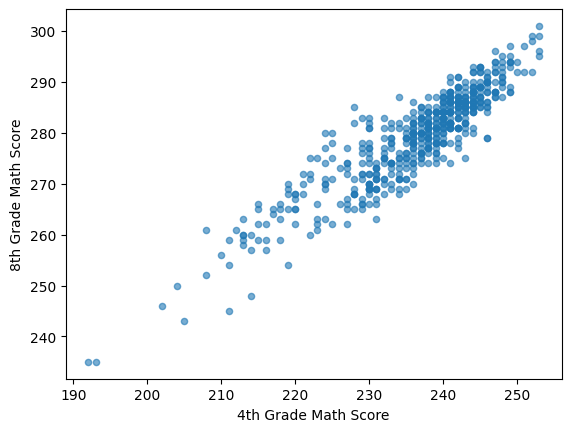

In [50]:
df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('4th Grade Math Score')
plt.ylabel('8th Grade Math Score')

The scatter plot above displays relationship between average 8th grade math scores and average 4th grade math scores. There is a strong positive correlation between these variables visually.

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

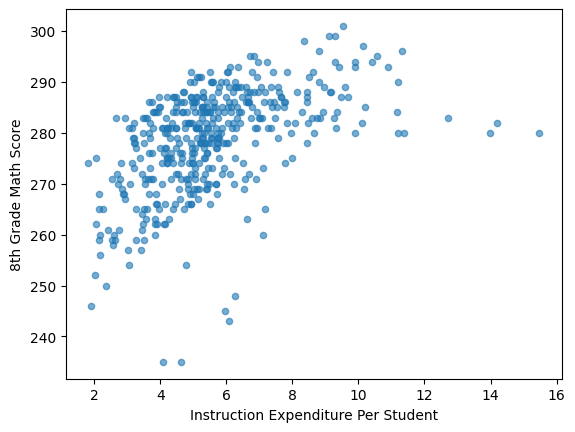

In [51]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE_PER_STUDENT', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Instruction Expenditure Per Student')
plt.ylabel('8th Grade Math Score')

The scatter plot above displays relationship between average 8th grade math scores and instruction expenditure per student. A loose postive correlation between the two variables can be observed.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# create input / output data
X = df[['INSTRUCTION_EXPENDITURE_PER_STUDENT','AVG_MATH_4_SCORE', 'AVG_READING_8_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

# ensure no Nan values in y
y.fillna(y.median(), inplace=True)

In [54]:
# split data into training and test sets
# 70% training, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [55]:
# import your sklearn class here
# using linear regression as we saw a correlation between instruction expenditure per student and 8th grade math scoreß
from sklearn.linear_model import LinearRegression

In [56]:
# create your model here
model = LinearRegression()

In [57]:
# fit model
model.fit(X_train, y_train)

LinearRegression()

In [58]:
# predict y values based on model
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [59]:
# r2 score
r2 = model.score(X_test, y_test)
print('r2 score: ', r2)

# mean error
meanErr = np.mean(model.predict(X_test)-y_test)
print('mean error: ', meanErr)

# mean absolute error
meanAbsErr = np.mean(np.abs(model.predict(X_test)-y_test))
print('mean absolute error: ', meanAbsErr)

r2 score:  0.9222145784775015
mean error:  0.5708618585327045
mean absolute error:  1.7749411563184028


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

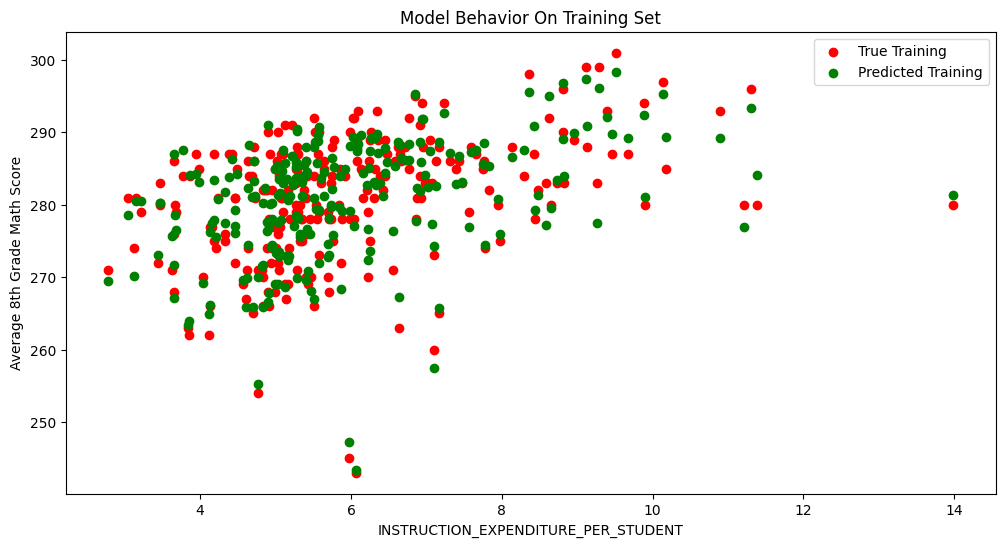

In [60]:
col_name = 'INSTRUCTION_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Average 8th Grade Math Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

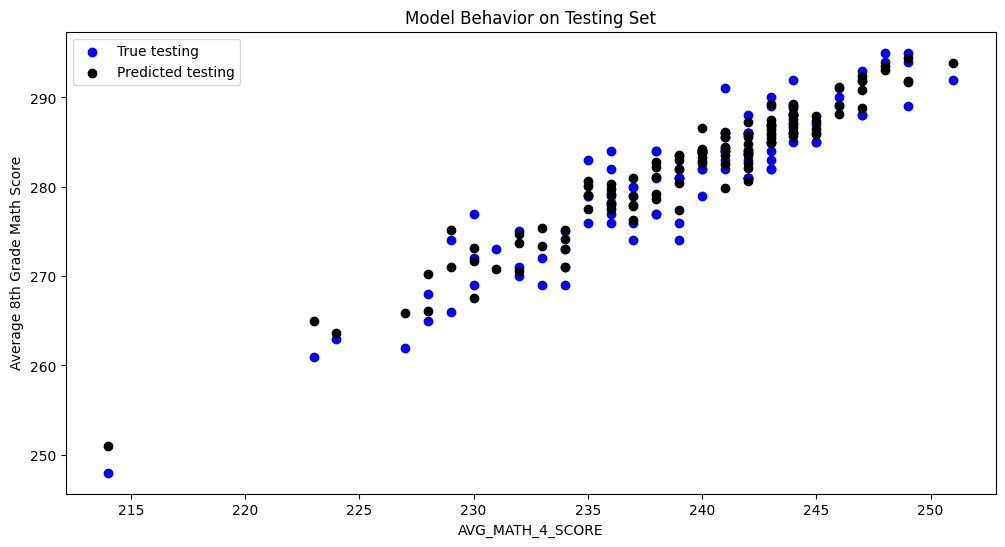

In [61]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Average 8th Grade Math Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

This project was created to analyze predictors for state-average 8th-grade math scores based on historical federal data collected over a number of years. The dataset aggregated U.S. Census Bureau data and NCES data, providing for a more holistic dataset comprising of average reading/math collected at the 4th/8th grade, enrollment per grade echelon/overall, state expenditure/revenue, and education expenditure in instruction/support/capital/other/total. Following data cleanup, we combined education expenditure with student enrollment to create per-student expenditure measurements. This feature engineering better accounted for disparities in state size and population. Following this, more exploratory data analysis through scatter plot visualizations revealed correlations between 8th-grade math scores and 4th-grade math scores as well as instructional expenditure per student. Seeing this, a linear regression was applied to the dataset to create a prediction model for 8th-grade math scores based on 4th-grade math scores, instructional expenditure per student, and 8th-grade reading scores. The model demonstrated a strong fit through a high r2 score (0.922) and a visually good fit.